In [1]:
import pandas as pd
import seaborn as sns

## pivot()
DataFrame.pivot(index=None, columns=None, value=None)

In [2]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### 基本形

In [3]:
flights_p = flights.pivot(index="year", columns="month", values=["passengers"])
# もしくは
flights_p = flights.pivot("year", "month","passengers")
flights_p

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='month', ylabel='year'>

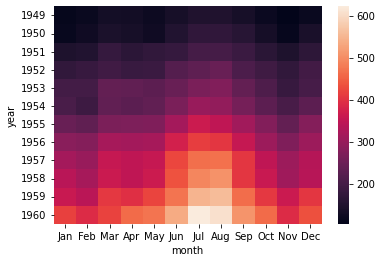

In [4]:
sns.heatmap(flights_p)

### 複数表示

In [5]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips = tips.pivot("day", "time")
# 重複するラベルがあるとエラーが発生する

ValueError: Index contains duplicate entries, cannot reshape

In [8]:
tips_g = tips.groupby(["day", "time"], as_index=False).sum()
tips_g

,day,time,total_bill,tip,size
0,Thur,Lunch,1077.55,168.83,150
1,Thur,Dinner,18.78,3.00,2
2,Fri,Lunch,89.92,16.68,14
3,Fri,Dinner,235.96,35.28,26
4,Sat,Lunch,0.00,0.00,0
5,Sat,Dinner,1778.40,260.40,219
6,Sun,Lunch,0.00,0.00,0
7,Sun,Dinner,1627.16,247.39,216


In [9]:
tips_p = tips_g.pivot("day","time")
tips_p

total_bill              tip          size       
time      Lunch   Dinner   Lunch  Dinner Lunch Dinner
day                                                  
Thur    1077.55    18.78  168.83    3.00   150      2
Fri       89.92   235.96   16.68   35.28    14     26
Sat        0.00  1778.40    0.00  260.40     0    219
Sun        0.00  1627.16    0.00  247.39     0    216

### 特定カラムの指定

In [13]:
tips_p2 = tips_g.pivot("day","time", values=["total_bill", "size"])
tips_p2

total_bill            size       
time      Lunch   Dinner  Lunch Dinner
day                                   
Thur    1077.55    18.78  150.0    2.0
Fri       89.92   235.96   14.0   26.0
Sat        0.00  1778.40    0.0  219.0
Sun        0.00  1627.16    0.0  216.0

<AxesSubplot:xlabel='None-time', ylabel='day'>

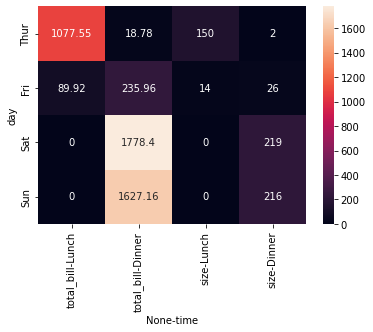

In [14]:
sns.heatmap(data=tips_p2, annot=True, fmt="g")

## pivot_table()
DataFrame.pivot_table()

In [15]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## 基本形

In [16]:
flight_pt = flights.pivot_table(index="year", columns="month", values="passengers")
flight_pt

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## 複数リストの指定

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips_pt = tips.pivot_table(index=["time", "day"], 
                          columns=["sex","smoker"], 
                          values="total_bill")
tips_pt

sex               Male                Female           
smoker             Yes         No        Yes         No
time   day                                             
Lunch  Thur  19.171000  18.486500  19.218571  15.899167
       Fri   11.386667        NaN  13.260000  15.980000
Dinner Thur        NaN        NaN        NaN  18.780000
       Fri   25.892000  17.475000  12.200000  22.750000
       Sat   21.837778  19.929063  20.266667  19.003846
       Sun   26.141333  20.403256  16.540000  20.824286

In [19]:
tips_pt2 = tips.pivot_table(fill_value=0, 
                           index=["time", "day"], 
                           columns=["sex","smoker"], 
                           values="total_bill")
tips_pt2

sex               Male                Female           
smoker             Yes         No        Yes         No
time   day                                             
Lunch  Thur  19.171000  18.486500  19.218571  15.899167
       Fri   11.386667   0.000000  13.260000  15.980000
Dinner Thur   0.000000   0.000000   0.000000  18.780000
       Fri   25.892000  17.475000  12.200000  22.750000
       Sat   21.837778  19.929063  20.266667  19.003846
       Sun   26.141333  20.403256  16.540000  20.824286

In [20]:
tips_pt = tips.pivot_table(index=["time", "day"], 
                         columns=["sex"], 
                         values=["total_bill","size"],
                         fill_value=0,
                         margins=True)
tips_pt

size                     total_bill                      
sex              Male    Female       All       Male     Female        All
time   day                                                                
Lunch  Thur  2.433333  2.483871  2.459016  18.714667  16.648710  17.664754
       Fri   1.666667  2.250000  2.000000  11.386667  13.940000  12.845714
Dinner Thur  0.000000  2.000000  2.000000   0.000000  18.780000  18.780000
       Fri   2.285714  2.000000  2.166667  23.487143  14.310000  19.663333
       Sat   2.644068  2.250000  2.517241  20.802542  19.680357  20.441379
       Sun   2.810345  2.944444  2.842105  21.887241  19.872222  21.410000
All          2.630573  2.459770  2.569672  20.744076  18.056897  19.785943

In [21]:
tips_pt = tips.pivot_table(index=["time", "day"], 
                         columns=["sex"], 
                         values=["total_bill","size"],
                         fill_value=0,
                         margins=True,
                         aggfunc=sum)
tips_pt

size               total_bill                  
sex         Male Female    All       Male   Female      All
time   day                                                 
Lunch  Thur   73     77  150.0     561.44   516.11  1077.55
       Fri     5      9   14.0      34.16    55.76    89.92
       Sat     0      0    NaN       0.00     0.00      NaN
       Sun     0      0    NaN       0.00     0.00      NaN
Dinner Thur    0      2    2.0       0.00    18.78    18.78
       Fri    16     10   26.0     164.41    71.55   235.96
       Sat   156     63  219.0    1227.35   551.05  1778.40
       Sun   163     53  216.0    1269.46   357.70  1627.16
All          413    214  627.0    3256.82  1570.95  4827.77

In [22]:
tips_pt = tips.pivot_table(index=["time", "day"], 
                         columns=["sex"], 
                         values=["total_bill"],
                         fill_value=0,
                         margins=True,
                         aggfunc=[sum, max])
tips_pt

sum                          max              
            total_bill                   total_bill              
sex               Male   Female      All       Male Female    All
time   day                                                       
Lunch  Thur     561.44   516.11  1077.55      41.19  43.11  43.11
       Fri       34.16    55.76    89.92      13.42  16.27  16.27
       Sat        0.00     0.00      NaN        NaN    NaN    NaN
       Sun        0.00     0.00      NaN        NaN    NaN    NaN
Dinner Thur       0.00    18.78    18.78       0.00  18.78  18.78
       Fri      164.41    71.55   235.96      40.17  22.75  40.17
       Sat     1227.35   551.05  1778.40      50.81  44.30  50.81
       Sun     1269.46   357.70  1627.16      48.17  35.26  48.17
All            3256.82  1570.95  4827.77      50.81  44.30  50.81